<a href="https://colab.research.google.com/github/benkivuva/100-DaysOfCode/blob/main/Penda_Health_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Google Drive in Colab
The code below imports the necessary module google.colab and uses it to mount your Google Drive in Colab. The drive.mount('/content/drive') line specifically mounts your Google Drive at the '/content/drive' directory, allowing you to access and work with files stored in your Google Drive within the Colab environment.

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Pandas and Read the Excel File**

This code snippet imports the pandas library and reads an Excel file into a pandas DataFrame. The Excel file path is specified as `/content/drive/MyDrive/BI_Analyst_Assessment_Data_2023.xlsx`.

By using the `pd.read_excel()` function from pandas, the contents of the Excel file are loaded into the DataFrame named `df`. The `read_excel()` function is specifically designed to read data from Excel files and convert them into tabular format.

To verify the successful loading of data, the code also prints the first few rows of the DataFrame using the `head()` function, which displays the top records of the DataFrame.

In [24]:
import pandas as pd

file_path = '/content/drive/MyDrive/BI_Analyst_Assessment_Data_2023.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Print the first few rows of the DataFrame
print(df.head())

    VisitCode    PatientCode       Date       VisitDateTime MedicalCenter  \
0  XA-1124501  38af25ef-37a9 2022-05-22 2022-05-22 08:51:05        Tassia   
1  XA-1220993  15ac7a77-8153 2022-09-07 2022-09-07 10:56:49        Tassia   
2  XA-1079995  173f581e-c323 2022-03-24 2022-03-24 17:17:32        Tassia   
3  XA-1188078  c464fa34-e7f2 2022-07-27 2022-07-27 05:54:02        Tassia   
4  XA-1220192  7b8216fe-ff14 2022-09-06 2022-09-06 12:28:24        Tassia   

     VisitCategory Payor  NPS Score  
0  In-person Visit  Cash        NaN  
1  In-person Visit  Cash        NaN  
2  In-person Visit  Cash        NaN  
3  In-person Visit  Cash        NaN  
4  In-person Visit  Cash        NaN  


**Data Cleaning: Override Invoice Amount for Insurance Visits**

In this code cell, I performed data cleaning operations to override invoice amounts less than 100 for insurance visits. The data was sourced from two separate sheets: 'Invoice Tbl' and 'Visit Tbl'.

First, I read the 'Invoice Tbl' sheet into a DataFrame named `invoice_df` using the `pd.read_excel()` function. Then, I merged this DataFrame with the existing DataFrame, `df` (containing the 'Visit Tbl' sheet), based on the common column 'Visit Code'.

Next, I filtered the merged DataFrame to include only insurance visits by selecting rows where the 'payor' column contained either 'Insurance Company A' or 'Insurance Company B'. This filtered data was stored in the `insurance_visits` DataFrame.

Finally, I modified the 'Amount' column in the `insurance_visits` DataFrame, overriding any invoice amounts less than 100 to a minimum value of 100.

By performing these data cleaning steps, I ensured that the dataset now reflects the defined rule of the minimum invoice amount of 100 for insurance visits.

In [47]:

# Read the Invoice Tbl sheet and visit tbl into a separate DataFrames
invoice_df = pd.read_excel(file_path, sheet_name='Invoice Tbl')
visit_df = pd.read_excel(file_path, sheet_name='Visit Tbl')

# Merge the two DataFrames on the 'Visit Code' column
merged_df = pd.merge(df, invoice_df, on='VisitCode')
print(merged_df.columns)

# Filter data for insurance visits
insurance_visits = merged_df[merged_df['Payor'].isin(['Insurance Company A', 'Insurance Company B'])]

# Override invoice amounts less than 100 for insurance visits
insurance_visits.loc[insurance_visits['Amount'] < 100, 'Amount'] = 100


print(insurance_visits)  # Print the DataFrame


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Index(['VisitCode', 'PatientCode', 'Date', 'VisitDateTime', 'MedicalCenter',
       'VisitCategory', 'Payor', 'NPS Score', 'Amount'],
      dtype='object')
        VisitCode    PatientCode       Date       VisitDateTime MedicalCenter  \
33647  XA-1174906  f2633692-cf89 2022-07-10 2022-07-10 19:00:28        Tassia   
33648  XA-1208757  111f2f12-facd 2022-08-22 2022-08-22 12:46:22        Tassia   
33649  XA-1133670  fa573a86-1955 2022-05-31 2022-05-31 17:14:28        Tassia   
33650  XA-1266765  338dc007-857b 2022-10-27 2022-10-27 22:01:22        Tassia   
33651  XA-1135950  c0679f30-1467 2022-06-02 2022-06-02 19:32:51        Tassia   
...           ...            ...        ...                 ...           ...   
46000  XA-1249429  152641fd-57b1 2022-10-09 2022-10-09 21:42:44      Pipeline   
46001  XA-1148829  98a60ab5-98b6 2022-06-14 2022-06-14 09:54:49      Embakasi   
46002  XA-1097992  019c4de2-d1cc 2022-04-19 2022-04-19 15:20:16  Lucky Summer   
46003  XA-1097992  019c4de2-d1cc 2

**Analysis of Visits at Kimathi Street and Pipeline Medical Centers (May 2022 - September 2022)**

This analysis focuses on determining the number of visits received by Kimathi Street Medical Center and Pipeline Medical Center between May 2022 and September 2022. The dataset contains information about medical center visits, including the date of the visits. By filtering the data based on the specified date range and medical centers, we can calculate and compare the visit counts for each center during this period. This analysis aims to provide insights into the patient traffic and utilization of these two medical centers during the specified timeframe.

In [25]:

# Filter the data based on the date range and medical centers
start_date = '2022-05-01'
end_date = '2022-09-30'
medical_centers = ['Kimathi Street', 'Pipeline']

# Filter the data based on the date range and medical centers
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date) & (df['MedicalCenter'].isin(medical_centers))]

# Count the number of visits for each medical center
visit_counts = filtered_df['MedicalCenter'].value_counts()

# Print the visit counts
for medical_center, count in visit_counts.items():
    print(f"{medical_center}: {count} visits")


Pipeline: 6043 visits
Kimathi Street: 2161 visits


**Analysis of Most Common Diagnosis in 2022 for Tassia and Embakasi Branches**

This analysis focuses on determining the most common diagnosis in the year 2022 for the combined data of Tassia and Embakasi branches. The dataset includes two separate sheets, "Visit Tbl" and "Diagnosis Tbl," which contain information about medical center visits and corresponding diagnoses. By merging the two DataFrames based on a common VisitCode, we establish a connection between the visit data and the corresponding diagnosis information. The analysis filters the merged data to include only the Tassia and Embakasi branches and restricts the observations to the year 2022. The diagnosis counts are then calculated, and the diagnosis with the highest occurrence is identified as the most common diagnosis. This analysis aims to provide insights into the prevalent medical conditions at Tassia and Embakasi branches during 2022, aiding in resource allocation and decision-making processes.

In [48]:

# Read the Excel file into separate DataFrames for Visit Tbl and Diagnosis Tbl
visit_df = pd.read_excel(file_path, sheet_name='Visit Tbl')
diagnosis_df = pd.read_excel(file_path, sheet_name='Diagnosis Tbl')

# Merge the visit and diagnosis dataframes based on VisitCode
merged_df_vd = pd.merge(visit_df, diagnosis_df, on='VisitCode')

# Check the column names in the merged DataFrame
print(merged_df_vd.columns)

# Filter the data for 2022 and Tassia and Embakasi branches
filtered_df_vd = merged_df_vd[(merged_df_vd['MedicalCenter'].isin(['Tassia', 'Embakasi']))]

# Count the occurrences of each diagnosis
diagnosis_counts = filtered_df_vd['Diagnosis'].value_counts()

# Get the most common diagnosis
most_common_diagnosis = diagnosis_counts.idxmax()

# Print the most common diagnosis
print("The most common diagnosis in 2022 for Tassia and Embakasi branches combined was:", most_common_diagnosis)



/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Index(['VisitCode', 'PatientCode', 'Date', 'VisitDateTime', 'MedicalCenter',
       'VisitCategory', 'Payor', 'NPS Score', 'Diagnosis'],
      dtype='object')
The most common diagnosis in 2022 for Tassia and Embakasi branches combined was: acute nasopharyngitis


In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each diagnosis
diagnosis_counts = filtered_df_vd['Diagnosis'].value_counts()

# Get the top 5 diagnoses
top_5_diagnoses = diagnosis_counts.head(5)

# Create a bar plot for the top 5 diagnoses
plt.figure(figsize=(10, 6))
top_5_diagnoses.plot(kind='bar')
plt.title('Top 5 Diagnoses in 2022 (Tassia and Embakasi)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Analysis of the Most Profitable Payor for Penda Health in 2022**

Description: This analysis aims to determine the most profitable payor for Penda Health in 2022 by considering the revenue generated per visit and assuming a gross average margin of 30%. Using the provided DataFrame, the code filters the data for the year 2022, calculates the profit for each visit based on the revenue, groups the data by payor, and identifies the payor with the highest total profit.

In [50]:

# Filter the data for the year 2022
filtered_df2 = merged_df[merged_df['Date'].dt.year == 2022]

# Calculate the profit for each visit based on a 30% gross margin
filtered_df2['Profit'] = filtered_df2['Amount'] * 0.3

# Group the data by payor and calculate the total profit
profit_by_payor = filtered_df2.groupby('Payor')['Profit'].sum()

# Get the most profitable payor
most_profitable_payor = profit_by_payor.idxmax()

# Print the most profitable payor
print("The most profitable payor for Penda Health in 2022 was:", most_profitable_payor)

The most profitable payor for Penda Health in 2022 was: Cash


**Visualization**

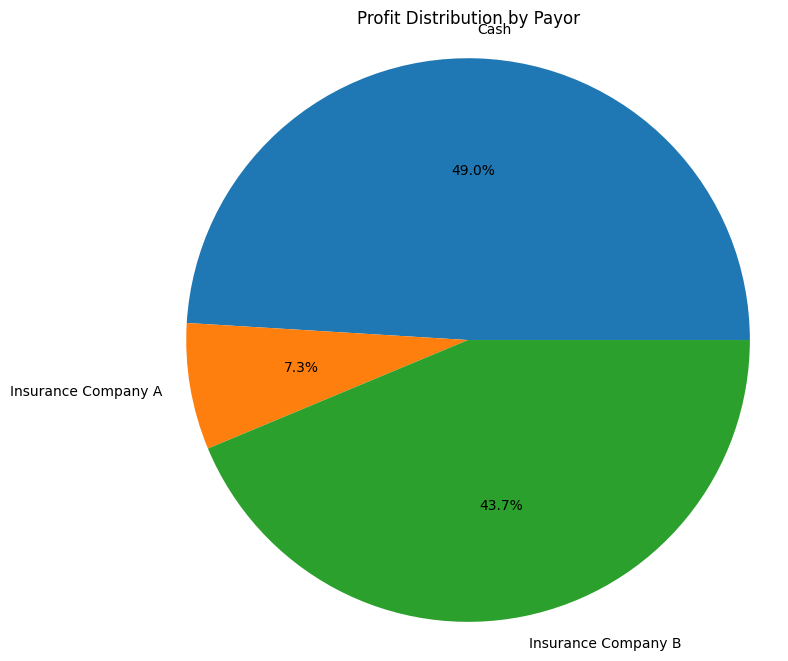

In [49]:
import matplotlib.pyplot as plt

# Group the data by payor and calculate the total profit
profit_by_payor = filtered_df2.groupby('Payor')['Profit'].sum()

# Create a pie chart for the profit distribution
plt.figure(figsize=(8, 8))
plt.pie(profit_by_payor, labels=profit_by_payor.index, autopct='%1.1f%%')
plt.title('Profit Distribution by Payor')
plt.axis('equal')
plt.show()

**Least profitable medical center**

To determine the least profitable medical center in 2022, assuming a gross average margin of 30% per visit, we can calculate the profit generated by each medical center using the 'Amount' column as the revenue per visit in the DataFrame merged_df. We can also visualized it

The least profitable medical center in 2022 (in absolute numbers) was: Call Centre


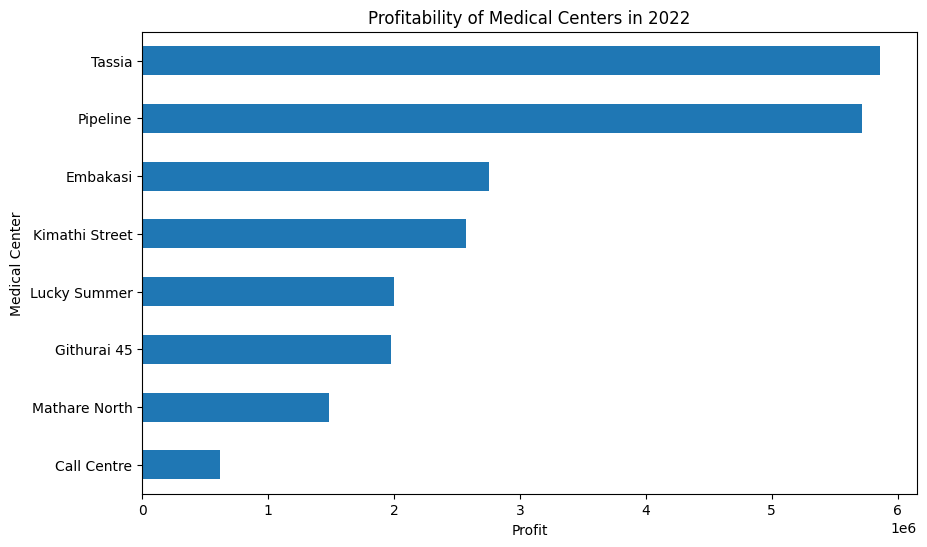

In [38]:

# Group the data by medical center and calculate the total profit
profit_by_medical_center = filtered_df2.groupby('MedicalCenter')['Profit'].sum()

# Get the least profitable medical center
least_profitable_medical_center = profit_by_medical_center.idxmin()

# Print the least profitable medical center
print("The least profitable medical center in 2022 (in absolute numbers) was:", least_profitable_medical_center)

# Sort the medical centers by profitability in ascending order
sorted_medical_centers = profit_by_medical_center.sort_values(ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sorted_medical_centers.plot(kind='barh')
plt.title('Profitability of Medical Centers in 2022')
plt.xlabel('Profit')
plt.ylabel('Medical Center')
plt.show()


**Calculation of Average Spend per Visit for Acute Gastritis Diagnoses**

This code merges the 'Invoice Tbl' and 'Diagnosis Table' DataFrames based on the 'VisitCode' column. It then filters the merged DataFrame to include only visits with a diagnosis of acute gastritis. The code calculates the average spend per visit by taking the mean of the 'Amount' column. Finally, it prints the average spend per visit for visits with a diagnosis of acute gastritis. This provides insights into the financial aspect of treating acute gastritis cases at Penda Health.

In [51]:

# Merge the Invoice Tbl and Diagnosis Table on VisitCode
merged_invoice_diagnosis_df = pd.merge(invoice_df, diagnosis_df, on='VisitCode')

# Filter the data for visits with a diagnosis of acute gastritis
filtered_df3 = merged_invoice_diagnosis_df[merged_invoice_diagnosis_df['Diagnosis'] == 'acute gastritis']

# Calculate the average spend per visit
average_spend_per_visit = filtered_df3['Amount'].mean()

# Print the average spend per visit
print("The average spend per visit for visits with a diagnosis of acute gastritis is:", average_spend_per_visit)


The average spend per visit for visits with a diagnosis of acute gastritis is: 2778.313685289595


**Analysis of Unique Patients with Blended Healthcare Approach at Penda Health in 2022**

This analysis aims to determine the number of unique patients who experienced a blended healthcare approach at Penda Health in 2022. By considering both in-person visits and telemedicine visits, the code filters the 'Visit Tbl' DataFrame for the year 2022 and visits categorized as 'In-Person Visit' or 'Telemedicine Visit'. It then calculates the count of unique patients based on their 'PatientCode' and provides the final result.

In [52]:
# Filter the data for the year 2022 and blended healthcare visits
filtered_df4 = visit_df[(visit_df['VisitCategory'].isin(['In-Person Visit', 'Telemedicine Visit'])) & (visit_df['Date'].dt.year == 2022)]

# Get the count of unique patients
unique_patient_count = filtered_df4['PatientCode'].nunique()

# Print the number of unique patients with a blended healthcare approach
print("The number of unique patients who experienced a blended healthcare approach in 2022 is:", unique_patient_count)


The number of unique patients who experienced a blended healthcare approach in 2022 is: 4542


**Calculation of Net Promoter Score (NPS) in Q3 2022**

This code calculates the Net Promoter Score (NPS) for the third quarter (Q3) of 2022 based on the 'NPS Score' column in the 'Visit tbl' DataFrame. It filters the data for Q3 2022, calculates the percentage of promoters (scores 9 and 10), detractors (scores 0 to 6), and passives (scores 7 and 8), and then calculates the NPS using the formula [(promoters - detractors) / total responses] * 100. The resulting NPS score is provided as the output.

In [43]:
# Filter the data for Q3 2022
filtered_df5 = visit_df[(visit_df['Date'].dt.year == 2022) & (visit_df['Date'].dt.quarter == 3)]

# Calculate the NPS score
nps_score = filtered_df5['NPS Score']

# Calculate the percentage of promoters, detractors, and passives
promoters = nps_score[nps_score >= 9][nps_score <= 10].count()
detractors = nps_score[nps_score <= 6].count()
passives = nps_score[nps_score >= 7][nps_score <= 8].count()

# Calculate the NPS
nps = (promoters - detractors) / (promoters + detractors + passives) * 100

# Print the NPS for Q3 2022
print("The Net Promoter Score (NPS) for Q3 2022 is:", nps)


The Net Promoter Score (NPS) for Q3 2022 is: 71.27937336814621


**Proportion of Second Visits in Penda Health during 2022**

This code calculates the proportion of second visits in Penda Health during the year 2022. It starts by filtering the data for the year 2022. Then, the visits are grouped by 'PatientCode', and the number of visits per patient is counted. Next, it identifies the visits where the count is at least 2, indicating second visits. Finally, it calculates the proportion of second visits by dividing the count of second visits by the total number of unique patients and provides the result as output. This proportion helps understand the rate of returning patients in Penda Health during 2022.

In [44]:
# Filter the data for the year 2022
filtered_df6 = visit_df[visit_df['Date'].dt.year == 2022]

# Group the visits by PatientCode and count the number of visits per patient
visit_counts = filtered_df6.groupby('PatientCode')['VisitCode'].count()

# Filter the visits where the count is at least 2
second_visits = visit_counts[visit_counts >= 2]

# Calculate the proportion of second visits
proportion_second_visits = len(second_visits) / len(visit_counts)

# Print the proportion of second visits in 2022
print("The proportion of second visits in Penda Health during 2022 is:", proportion_second_visits)


The proportion of second visits in Penda Health during 2022 is: 0.29289836711711714


**Percentage of Visits within 30 Days of the Preceding Visit in April 2022**

This code calculates the percentage of visits in April 2022 that occurred within 30 days of the preceding visit by the same patient. It filters the data for April 2022 and sorts the visits by patient and visit date. By calculating the time difference between consecutive visits for each patient, it identifies the visits that happened within a 30-day window of the preceding visit. Then, it calculates the count of such visits and the total number of visits in April 2022 to determine the percentage. The resulting percentage represents the rate of consecutive visits within 30 days for that month.

In [46]:
# Filter the data for April 2022
filtered_df7 = visit_df[(visit_df['Date'].dt.year == 2022) & (visit_df['Date'].dt.month == 4)]

# Sort the data by patient and visit date
sorted_df = filtered_df7.sort_values(by=['PatientCode', 'Date'])

# Calculate the time difference between consecutive visits for each patient
sorted_df['TimeDiff'] = sorted_df.groupby('PatientCode')['Date'].diff()

# Count the number of visits within 30 days of the preceding visit
within_30_days_count = len(sorted_df[sorted_df['TimeDiff'] <= pd.Timedelta(days=30)])

# Calculate the percentage of visits within 30 days
total_visits = len(filtered_df7)
percent_within_30_days = (within_30_days_count / total_visits) * 100

# Print the percentage of visits within 30 days in April 2022
print("The percentage of visits in April 2022 within 30 days of the preceding visit by the same patient is:", percent_within_30_days)


The percentage of visits in April 2022 within 30 days of the preceding visit by the same patient is: 16.010916534000454
